In [1]:
import numpy as np
import pandas as pd
import json
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from emocoder.src import utils, constants
from emocoder.experiments import constants as xconstants

In [2]:
def vs(df1, df2):
    rt = (df1 - df2).mean(axis=1)
    rt.loc["mean"] = rt.mean()
    return rt

In [3]:
acl_columnwidth_in_inch = 7.7 / 2.54

In [4]:
split = "test"  # dev or test

## Loading Aggregated Experimental Data

In [15]:
baseline = pd.read_csv(xconstants.WORD_BASELINE_BASEPATH / split / "overview.csv", index_col=0)
baseline.rename(index={"Stadhagen_VA": "Stadthagen_VA"}, inplace=True)
#baseline.drop(index="mean", inplace=True)
#baseline.drop(columns="mean", inplace=True)
#baseline.rename(inplace=True, index={old:old[0].lower()+old[1:] for old in baseline.index})
#baseline.rename(inplace=True, index={old:old.replace("_", "") for old in baseline.index})
baseline.loc["mean"] = baseline.mean(axis=0)
baseline

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,rec_mean,prec_trust,...,f1_fear,prec_disgust,rec_disgust,f1_disgust,prec_surprise,rec_surprise,f1_surprise,prec_fear,f1_anticipation,mean
wierzba,NaN,NaN,NaN,0.823516,0.808974,0.810866,0.811077,0.819623,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814811
vo,0.869918,0.765501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817710
stevenson,NaN,NaN,NaN,0.923746,0.898302,0.901358,0.892764,0.884073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900049
stadthagenVA,0.853103,0.796753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824928
stadthagenBE,NaN,NaN,NaN,0.749644,0.796137,0.833240,0.798337,0.748228,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.785117
riegel,0.854038,0.734849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.794443
kapucuVA,0.746853,0.720588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733720
kapucuBE,NaN,NaN,NaN,0.840546,0.827121,0.831287,0.794208,0.794409,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817514
briesemeister,NaN,NaN,NaN,0.802846,0.760501,0.780255,0.830140,0.655370,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765823
anew,0.916998,0.698163,0.834116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.816426


In [16]:
proposed = pd.read_csv(xconstants.WORD_PROPOSED_BASEPATH / split / "overview.csv", index_col=0)
proposed.loc["mean"] = proposed.mean(axis=0)
proposed

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.827590,0.811855,0.809664,0.805822,0.815360,0.814058
vo,0.868760,0.773950,NaN,NaN,NaN,NaN,NaN,NaN,0.821355
stevenson,NaN,NaN,NaN,0.925936,0.898383,0.903455,0.887358,0.876561,0.898339
stadthagenVA,0.846835,0.785776,NaN,NaN,NaN,NaN,NaN,NaN,0.816305
stadthagenBE,NaN,NaN,NaN,0.752292,0.794843,0.834358,0.801641,0.752813,0.787190
riegel,0.859931,0.726814,NaN,NaN,NaN,NaN,NaN,NaN,0.793372
kapucuVA,0.752915,0.731207,NaN,NaN,NaN,NaN,NaN,NaN,0.742061
kapucuBE,NaN,NaN,NaN,0.839502,0.818780,0.839873,0.810749,0.800111,0.821803
briesemeister,NaN,NaN,NaN,0.811691,0.784102,0.780307,0.838867,0.652587,0.773511
anew,0.920883,0.686007,0.817684,NaN,NaN,NaN,NaN,NaN,0.808191


In [17]:
if split == "dev":
    multitask = pd.read_csv(xconstants.WORD_MULTITASK_BASEPATH/ split / "overview.csv", index_col=[0,1])
    multitask.drop(index="overall", level=1, inplace=True)
    multitask = multitask.sum(axis=0, level=1)
    multitask = multitask.replace(0., np.nan)
    multitask.rename(inplace=True, index={"ANEW1999": "anew", "Stevenson2007": "stevenson"})
    multitask.rename(inplace=True, index={old:old[0].lower()+old[1:] for old in multitask.index})
    multitask.rename(inplace=True, index={old:old.replace("_", "") for old in multitask.index})
    multitask.loc["mean"] = multitask.mean(axis=0)
elif split == "test":
    multitask = pd.read_csv(xconstants.WORD_MULTITASK_BASEPATH/ split / "overview.csv", index_col=[0])
    multitask.rename(inplace=True, index={"ANEW1999": "anew", "Stevenson2007": "stevenson"})
    multitask.rename(inplace=True, index={old:old[0].lower()+old[1:] for old in multitask.index})
    multitask.rename(inplace=True, index={old:old.replace("_", "") for old in multitask.index})
    multitask.loc["mean"] = multitask.mean(axis=0)


multitask

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.893563,0.825321,0.817482,0.830482,0.845938,0.842557
vo,0.897406,0.768625,NaN,NaN,NaN,NaN,NaN,NaN,0.833015
stevenson,NaN,NaN,NaN,0.930205,0.881169,0.891824,0.897756,0.861015,0.892394
stadthagenVA,0.872916,0.799664,NaN,NaN,NaN,NaN,NaN,NaN,0.836290
stadthagenBE,NaN,NaN,NaN,0.821995,0.838955,0.860236,0.844306,0.767661,0.826631
riegel,0.908932,0.763989,NaN,NaN,NaN,NaN,NaN,NaN,0.836460
kapucuVA,0.776722,0.748037,NaN,NaN,NaN,NaN,NaN,NaN,0.762379
kapucuBE,NaN,NaN,NaN,0.841863,0.828716,0.823999,0.788192,0.810165,0.818587
briesemeister,NaN,NaN,NaN,0.851605,0.771095,0.693084,0.843364,0.641899,0.760209
anew,0.931778,0.711083,0.83823,NaN,NaN,NaN,NaN,NaN,0.827030


In [18]:
augmented = pd.read_csv(xconstants.WORD_AUGMENTED_BASEPATH/ split /"overview.csv", index_col=0)
#augmented.drop(inplace=True, columns="mean")
#augmented.rename(inplace=True, index={old: old[:-10] for old in augmented.index})
#augmented.rename(inplace=True, index={"XANEW_BE": "xanew_be", "XANEW": "xanew"})
#augmented.rename(inplace=True, index={"XANEW_BE": "xanewBE", "XANEW": "xanewVAD"})
#augmented.rename(inplace=True, index={old:old[0].lower()+old[1:] for old in augmented.index})
#augmented.rename(inplace=True, index={old:old.replace("_", "") for old in augmented.index})
augmented.loc["mean"] = augmented.mean(axis=0)
augmented

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.816595,0.789785,0.785241,0.804239,0.790830,0.797338
vo,0.860398,0.772960,NaN,NaN,NaN,NaN,NaN,NaN,0.816679
stevenson,NaN,NaN,NaN,0.927438,0.895459,0.892298,0.896444,0.869863,0.896300
stadthagenVA,0.853708,0.791352,NaN,NaN,NaN,NaN,NaN,NaN,0.822530
stadthagenBE,NaN,NaN,NaN,0.751232,0.787498,0.827293,0.786844,0.727617,0.776097
riegel,0.857372,0.731745,NaN,NaN,NaN,NaN,NaN,NaN,0.794558
kapucuVA,0.751853,0.717669,NaN,NaN,NaN,NaN,NaN,NaN,0.734761
kapucuBE,NaN,NaN,NaN,0.856075,0.810218,0.829077,0.807563,0.783238,0.817234
briesemeister,NaN,NaN,NaN,0.815268,0.771211,0.757550,0.826803,0.660468,0.766260
anew,0.931014,0.720374,0.835996,NaN,NaN,NaN,NaN,NaN,0.829128


In [19]:
zeroshotbaseline = pd.read_csv(xconstants.WORD_ZEROSHOTBASELINE_BASEPATH / split / "overview.csv", index_col=0)
#zeroshotbaseline.rename(inplace=True, index={"xanewVA": "xanewVAD"})
zeroshotbaseline.loc["mean"] = zeroshotbaseline.mean(axis=0)
zeroshotbaseline

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.870176,0.796684,0.752381,0.760718,0.770518,0.790095
vo,0.837439,0.526686,NaN,NaN,NaN,NaN,NaN,NaN,0.682062
stevenson,NaN,NaN,NaN,0.921368,0.830880,0.823176,0.858569,0.744771,0.835753
stadthagenVA,0.868861,0.561274,NaN,NaN,NaN,NaN,NaN,NaN,0.715068
stadthagenBE,NaN,NaN,NaN,0.804068,0.796731,0.841610,0.794158,0.706603,0.788634
riegel,0.918978,0.699699,NaN,NaN,NaN,NaN,NaN,NaN,0.809339
kapucuVA,0.760963,0.662924,NaN,NaN,NaN,NaN,NaN,NaN,0.711944
kapucuBE,NaN,NaN,NaN,0.794008,0.741750,0.704115,0.690060,0.700697,0.726126
briesemeister,NaN,NaN,NaN,0.826550,0.723712,0.551712,0.779555,0.415641,0.659434
anew,0.926209,0.652975,0.790172,NaN,NaN,NaN,NaN,NaN,0.789785


In [20]:
zeroshot = pd.read_csv(xconstants.WORD_ZEROSHOT_BASEPATH/ split / "overview.csv", index_col=0)
#zeroshot.drop(inplace=True, columns="mean")
zeroshot.loc["mean"] = zeroshot.mean(axis=0)
zeroshot

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.883533,0.574813,0.588598,0.684655,0.770399,0.700399
vo,0.846178,0.435951,NaN,NaN,NaN,NaN,NaN,NaN,0.641065
stevenson,NaN,NaN,NaN,0.889960,0.770068,0.691919,0.819801,0.726111,0.779572
stadthagenVA,0.861417,0.216723,NaN,NaN,NaN,NaN,NaN,NaN,0.539070
stadthagenBE,NaN,NaN,NaN,0.757320,0.568644,0.660058,0.769951,0.669606,0.685116
riegel,0.911651,0.658266,NaN,NaN,NaN,NaN,NaN,NaN,0.784958
kapucuVA,0.753603,0.569229,NaN,NaN,NaN,NaN,NaN,NaN,0.661416
kapucuBE,NaN,NaN,NaN,0.802864,0.648805,0.553387,0.589805,0.701413,0.659255
briesemeister,NaN,NaN,NaN,0.786881,0.377656,0.397134,0.743676,0.437455,0.548560
anew,0.915069,0.443021,0.753775,NaN,NaN,NaN,NaN,NaN,0.703955


In [21]:
augzero = pd.read_csv(xconstants.WORD_AUGZERO_BASEPATH/ split / "overview.csv", index_col=0)
augzero.loc["mean"] = augzero.mean(axis=0)
augzero

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.894236,0.781463,0.690885,0.777179,0.779856,0.784724
vo,0.848272,0.560030,NaN,NaN,NaN,NaN,NaN,NaN,0.704151
stevenson,NaN,NaN,NaN,0.925592,0.830972,0.840286,0.855235,0.768595,0.844136
stadthagenVA,0.873755,0.587085,NaN,NaN,NaN,NaN,NaN,NaN,0.730420
stadthagenBE,NaN,NaN,NaN,0.785784,0.793361,0.802892,0.794276,0.686707,0.772604
riegel,0.911713,0.678995,NaN,NaN,NaN,NaN,NaN,NaN,0.795354
kapucuVA,0.776098,0.658697,NaN,NaN,NaN,NaN,NaN,NaN,0.717397
kapucuBE,NaN,NaN,NaN,0.801551,0.726330,0.648235,0.687645,0.688110,0.710374
briesemeister,NaN,NaN,NaN,0.818614,0.724619,0.417666,0.784483,0.424584,0.633993
anew,0.927520,0.700669,0.802539,NaN,NaN,NaN,NaN,NaN,0.810242


---

### Comparing Conditions by Mean over Everything

In [22]:
s = [df.loc["mean", "mean"] for df in [baseline, proposed,augmented, multitask, zeroshotbaseline , zeroshot, augzero]]
s = pd.Series(s)
s.index = ["baseline", "proposed", "augmented","multitask", "zeroshotbaseline", "zeroshot", "augzero"]
s = s.sort_values()
s

zeroshot            0.670337
augzero             0.750340
zeroshotbaseline    0.750824
augmented           0.805089
baseline            0.807054
proposed            0.807618
multitask           0.823555
dtype: float64

[Text(0, 0, 'zeroshot'),
 Text(0, 0, 'augzero'),
 Text(0, 0, 'zeroshotbaseline'),
 Text(0, 0, 'augmented'),
 Text(0, 0, 'baseline'),
 Text(0, 0, 'proposed'),
 Text(0, 0, 'multitask')]

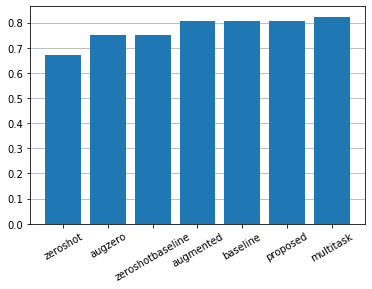

In [23]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)#grid below artits
ax.grid(axis="y")
ax.bar(x=s.index, height=s)
ax.set_xticklabels(labels=s.index, rotation=30)


---

### Pairwise Comparisons

In [24]:
(proposed - baseline).round(2)

,anger,arousal,disgust,dominance,f1_anger,f1_anticipation,f1_disgust,f1_fear,f1_joy,f1_mean,...,rec_fear,rec_joy,rec_mean,rec_negative,rec_positive,rec_sadness,rec_surprise,rec_trust,sadness,valence
wierzba,0.00,NaN,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,NaN
vo,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00
stevenson,0.00,NaN,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
stadthagenVA,NaN,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01
stadthagenBE,-0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
riegel,NaN,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
kapucuVA,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
kapucuBE,-0.01,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN
briesemeister,0.02,NaN,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
anew,NaN,-0.01,NaN,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [25]:
vs(proposed, baseline)

wierzba         -0.000753
vo               0.003645
stevenson       -0.001710
stadthagenVA    -0.008623
stadthagenBE     0.002072
riegel          -0.001071
kapucuVA         0.008340
kapucuBE         0.004289
briesemeister    0.007688
anew            -0.008234
mean             0.000462
dtype: float64

Basically not difference anywhere

In [26]:
(multitask - proposed).round(2)

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.07,0.01,0.01,0.02,0.03,0.03
vo,0.03,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
stevenson,NaN,NaN,NaN,0.00,-0.02,-0.01,0.01,-0.02,-0.01
stadthagenVA,0.03,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.02
stadthagenBE,NaN,NaN,NaN,0.07,0.04,0.03,0.04,0.01,0.04
riegel,0.05,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.04
kapucuVA,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.02
kapucuBE,NaN,NaN,NaN,0.00,0.01,-0.02,-0.02,0.01,-0.00
briesemeister,NaN,NaN,NaN,0.04,-0.01,-0.09,0.00,-0.01,-0.01
anew,0.01,0.03,0.02,NaN,NaN,NaN,NaN,NaN,0.02


In [27]:
vs(multitask, proposed)

wierzba          0.028499
vo               0.011661
stevenson       -0.005945
stadthagenVA     0.019985
stadthagenBE     0.039441
riegel           0.043088
kapucuVA         0.020319
kapucuBE        -0.003216
briesemeister   -0.013301
anew             0.018839
mean             0.015773
dtype: float64

There may be a slight increase or decrease in Performance depending on the dataset pair. Disgust suffers the most, but this comes largely from a single dataset. This shows that I can share encoders and decoders over labelsets and domains which is a major hypothesis. Multitask is slightly better in the end.

---

In [28]:
(augmented-multitask).round(2)

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,-0.08,-0.04,-0.03,-0.03,-0.06,-0.05
vo,-0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
stevenson,NaN,NaN,NaN,-0.00,0.01,0.00,-0.00,0.01,0.00
stadthagenVA,-0.02,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.01
stadthagenBE,NaN,NaN,NaN,-0.07,-0.05,-0.03,-0.06,-0.04,-0.05
riegel,-0.05,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,-0.04
kapucuVA,-0.02,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,-0.03
kapucuBE,NaN,NaN,NaN,0.01,-0.02,0.01,0.02,-0.03,-0.00
briesemeister,NaN,NaN,NaN,-0.04,0.00,0.06,-0.02,0.02,0.01
anew,-0.00,0.01,-0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [29]:
vs(augmented, multitask)

wierzba         -0.045219
vo              -0.016336
stevenson        0.003907
stadthagenVA    -0.013760
stadthagenBE    -0.050534
riegel          -0.041902
kapucuVA        -0.027619
kapucuBE        -0.001353
briesemeister    0.006050
anew             0.002098
mean            -0.018263
dtype: float64

In [30]:
vs(augmented, baseline)

wierzba         -0.017473
vo              -0.001031
stevenson       -0.003748
stadthagenVA    -0.002398
stadthagenBE    -0.009020
riegel           0.000115
kapucuVA         0.001040
kapucuBE        -0.000280
briesemeister    0.000437
anew             0.012702
mean            -0.002028
dtype: float64

In [31]:
vs(augmented, proposed)

wierzba         -0.016720
vo              -0.004676
stevenson       -0.002038
stadthagenVA     0.006224
stadthagenBE    -0.011093
riegel           0.001186
kapucuVA        -0.007300
kapucuBE        -0.004569
briesemeister   -0.007251
anew             0.020937
mean            -0.002490
dtype: float64

Augmented is a bit worse than multitask but only marginally worse than the baseline.

---

In [32]:
(augzero - zeroshot).round(2)

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
wierzba,NaN,NaN,NaN,0.01,0.21,0.10,0.09,0.01,0.08
vo,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN,0.06
stevenson,NaN,NaN,NaN,0.04,0.06,0.15,0.04,0.04,0.06
stadthagenVA,0.01,0.37,NaN,NaN,NaN,NaN,NaN,NaN,0.19
stadthagenBE,NaN,NaN,NaN,0.03,0.22,0.14,0.02,0.02,0.09
riegel,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.01
kapucuVA,0.02,0.09,NaN,NaN,NaN,NaN,NaN,NaN,0.06
kapucuBE,NaN,NaN,NaN,-0.00,0.08,0.09,0.10,-0.01,0.05
briesemeister,NaN,NaN,NaN,0.03,0.35,0.02,0.04,-0.01,0.09
anew,0.01,0.26,0.05,NaN,NaN,NaN,NaN,NaN,0.11


Zeroshot learning works massively better with data augmentation. (Although effect may go away when I introduce embedding similarity loss during encoder training

---

In [33]:
baseline["mean"]

wierzba          0.814811
vo               0.817710
stevenson        0.900049
stadthagenVA     0.824928
stadthagenBE     0.785117
riegel           0.794443
kapucuVA         0.733720
kapucuBE         0.817514
briesemeister    0.765823
anew             0.816426
mean             0.807054
Name: mean, dtype: float64

In [34]:
proposed["mean"]

wierzba          0.814058
vo               0.821355
stevenson        0.898339
stadthagenVA     0.816305
stadthagenBE     0.787190
riegel           0.793372
kapucuVA         0.742061
kapucuBE         0.821803
briesemeister    0.773511
anew             0.808191
mean             0.807618
Name: mean, dtype: float64

In [35]:
conditions = {"baseline": baseline, "proposed": proposed,  "augmented": augmented, "multitask": multitask, 
              "zeroshotbaseline": zeroshotbaseline, "zeroshot": zeroshot, "augzero": augzero}

In [36]:
outcome = pd.DataFrame({key: value["mean"] for key, value in conditions.items()})
outcome.columns = ["Bsl", "Sng", "Aug", "Mlt", "BsZ",  "SnZ", "AuZ"]
outcome = outcome.loc[["anew", "stevenson", "stadthagenVA", "stadthagenBE", "vo", "briesemeister",
                      "riegel", "wierzba", "kapucuVA", "kapucuBE", "mean"]]
outcome

,Bsl,Sng,Aug,Mlt,BsZ,SnZ,AuZ
anew,0.816426,0.808191,0.829128,0.827030,0.789785,0.703955,0.810242
stevenson,0.900049,0.898339,0.896300,0.892394,0.835753,0.779572,0.844136
stadthagenVA,0.824928,0.816305,0.822530,0.836290,0.715068,0.539070,0.730420
stadthagenBE,0.785117,0.787190,0.776097,0.826631,0.788634,0.685116,0.772604
vo,0.817710,0.821355,0.816679,0.833015,0.682062,0.641065,0.704151
briesemeister,0.765823,0.773511,0.766260,0.760209,0.659434,0.548560,0.633993
riegel,0.794443,0.793372,0.794558,0.836460,0.809339,0.784958,0.795354
wierzba,0.814811,0.814058,0.797338,0.842557,0.790095,0.700399,0.784724
kapucuVA,0.733720,0.742061,0.734761,0.762379,0.711944,0.661416,0.717397
kapucuBE,0.817514,0.821803,0.817234,0.818587,0.726126,0.659255,0.710374


In [37]:
outcome.rename(inplace=True,
               index={"anew": "en1",
                      "stevenson": "en2", 
                      "stadthagenVA": "es1",
                      "stadthagenBE": "es2",
                      "vo": "de1", 
                      "briesemeister": "de2",
                      "riegel": "pl1",
                      "wierzba": "pl2",
                      "kapucuVA": "tr1",
                      "kapucuBE": "tr2",
                      "mean": "MEAN"})

In [38]:
print(outcome.round(3).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    Bsl &    Sng &    Aug &    Mlt &    BsZ &    SnZ &    AuZ \\
\midrule
en1  &  0.816 &  0.808 &  0.829 &  0.827 &  0.790 &  0.704 &  0.810 \\
en2  &  0.900 &  0.898 &  0.896 &  0.892 &  0.836 &  0.780 &  0.844 \\
es1  &  0.825 &  0.816 &  0.823 &  0.836 &  0.715 &  0.539 &  0.730 \\
es2  &  0.785 &  0.787 &  0.776 &  0.827 &  0.789 &  0.685 &  0.773 \\
de1  &  0.818 &  0.821 &  0.817 &  0.833 &  0.682 &  0.641 &  0.704 \\
de2  &  0.766 &  0.774 &  0.766 &  0.760 &  0.659 &  0.549 &  0.634 \\
pl1  &  0.794 &  0.793 &  0.795 &  0.836 &  0.809 &  0.785 &  0.795 \\
pl2  &  0.815 &  0.814 &  0.797 &  0.843 &  0.790 &  0.700 &  0.785 \\
tr1  &  0.734 &  0.742 &  0.735 &  0.762 &  0.712 &  0.661 &  0.717 \\
tr2  &  0.818 &  0.822 &  0.817 &  0.819 &  0.726 &  0.659 &  0.710 \\
MEAN &  0.807 &  0.808 &  0.805 &  0.824 &  0.751 &  0.670 &  0.750 \\
\bottomrule
\end{tabular}



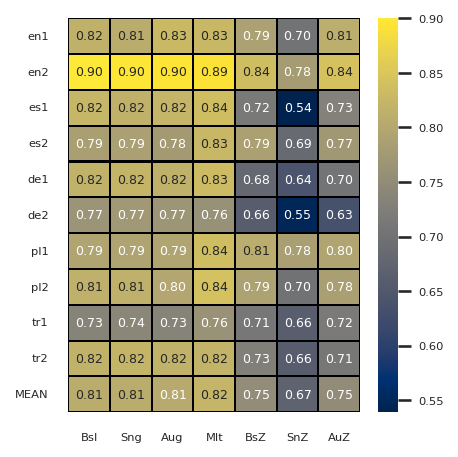

In [39]:
sns.set(font_scale=.5)
fig, ax = plt.subplots(figsize=(acl_columnwidth_in_inch, 1*acl_columnwidth_in_inch), dpi=150)
sns.heatmap(outcome, annot=True, cmap="cividis", fmt=".2f", ax=ax, linewidth=.5, linecolor="black")
plt.yticks(rotation=0)
#ax.set_xlabel("Condition")
#ax.set_ylabel("Dataset")
#ax.set_title("Word Dataset Dev Results")
fig.tight_layout()
fig.savefig("word-test-results.pdf")

In [ ]:
round(augzero - zeroshotbaseline, 2)

## Significane Tests

In [ ]:
import scipy.stats as st

In [ ]:
# Baseline vs. Multitask:
st.wilcoxon(x=outcome.Bsl, y=outcome.Mlt, alternative="two-sided")

In [ ]:
# Zeroshot Baseline vs. Zeroshot Augment:
st.wilcoxon(x=outcome.BsZ, y=outcome.AuZ, alternative="two-sided")

---

## Per-Variable Results

In [ ]:
word_data_name_map = {"anew": "en1",
                      "stevenson": "en2", 
                      "stadthagenVA": "es1",
                      "stadthagenBE": "es2",
                      "vo": "de1", 
                      "briesemeister": "de2",
                      "riegel": "pl1",
                      "wierzba": "pl2",
                      "kapucuVA": "tr1",
                      "kapucuBE": "tr2"}

In [ ]:
variable_name_map = {"valence": "Val", "arousal": "Aro", "dominance": "Dom", "joy": "Joy", "anger": "Ang",
                     "sadness": "Sad", "fear": "Fear", "disgust": "Dis", "mean": "Mean"}

In [ ]:
def reformat(df, row_renamer, column_renamer, model, setting, level):
    df = copy.deepcopy(df)
    df = df.drop(index="mean").rename(index=row_renamer)
    df.index.rename("Test", inplace=True)
    df = pd.concat([df], keys=[model], names=["Model"])
    df = pd.concat([df], keys=[setting], names=["Setting"])
    df = pd.concat([df], keys=[level], names=["Level"])
    df = pd.concat([df], keys=[""], names=["Train"])
    df = df.rename(columns=column_renamer)
    return df

In [ ]:
baseline_new = reformat(baseline, word_data_name_map, variable_name_map, "FFN", "supervised", "word")
baseline_new

In [ ]:
multitask_new = reformat(multitask, word_data_name_map, variable_name_map, "FFN+PPH", "supervised", "word")
multitask_new

In [ ]:
zeroshotbaseline_new = reformat(zeroshotbaseline, word_data_name_map, variable_name_map, "FFN", "zeroshot", "word")
zeroshotbaseline_new

In [ ]:
augzero_new = reformat(augzero, word_data_name_map, variable_name_map, "FFN+PPH", "zeroshot", "word")
augzero_new

In [ ]:
word_full = pd.concat([baseline_new, multitask_new, zeroshotbaseline_new,augzero_new]).reorder_levels(["Level", "Test", "Setting", "Model", "Train"]).sort_index().round(3)
# reorder levels of multiindex to reorder based on dataset and then change back to old order.
word_full = word_full.reorder_levels((1,0,2,3,4)).loc[["en1", "en2", "es1", "es2", "de1", "de2", "pl1", "pl2", "tr1", "tr2"]].reorder_levels((1,0,2,3,4))

In [ ]:
print(word_full.to_latex(na_rep="---").replace(" 0."," ."))